In [1]:
!pip install gprofiler-official pandas seaborn matplotlib

In [2]:
import pandas as pd
import requests
import networkx as nx
import matplotlib.pyplot as plt
import glob
import numpy as np
from scipy.stats import ttest_ind
from statsmodels.stats.multitest import multipletests
import seaborn as sns
from matplotlib_venn import venn3
from gprofiler import GProfiler
from google.colab import files
import os
import matplotlib.colors as mcolors
import matplotlib.cm as cm

In [3]:
uploaded = files.upload()

Saving Upregulated_DEGs.csv to Upregulated_DEGs.csv


In [4]:
filtered_genes = pd.read_csv("Upregulated_DEGs.csv")

In [5]:
filtered_genes

,Gene,log2FC,p-value,adj_p-value
0,CDT1,1.990346,1.054444e-05,0.000612
1,CDC25B,1.819140,8.742672e-04,0.009077
2,GJB3,1.731946,2.151222e-04,0.003400
3,RAC1,1.251719,1.532393e-03,0.013495
4,POLD1,1.174322,1.346576e-03,0.012296
...,...,...,...,...
559,ASPM,2.344134,6.901622e-07,0.000187
560,AGT,1.469028,1.540707e-05,0.000736
561,CD46,1.141880,9.695538e-04,0.009707
562,SOX4,1.918485,2.119578e-04,0.003371


In [6]:
filtered_genes.columns

Index(['Gene', 'log2FC', 'p-value', 'adj_p-value'], dtype='object')

In [7]:
df_filtered = filtered_genes.drop(columns=['log2FC', 'p-value', 'adj_p-value'])

In [8]:
gcna_filtered_genes = df_filtered['Gene'].tolist()

In [9]:
len(gcna_filtered_genes)

564

In [10]:
gcna_filtered_genes

['CDT1',
 'CDC25B',
 'GJB3',
 'RAC1',
 'POLD1',
 'ACTR5',
 'EZH2',
 'NUP160',
 'CSTF2',
 'GZMB',
 'PFKFB4',
 'TEX10',
 'CCL24',
 'NEK2',
 'DHCR7',
 'CASK',
 'SLC7A11',
 'TAF1A',
 'PLAU',
 'RUVBL1',
 'WDR4',
 'CCL20',
 'EREG',
 'PODXL2',
 'SEC23B',
 'TRIM29',
 'AHCY',
 'XPO4',
 'ADNP',
 'RAD54L',
 'RFC3',
 'DPM1',
 'RFC5',
 'MFAP2',
 'EXOSC5',
 'UCHL3',
 'LACTB2',
 'PAQR4',
 'GAD1',
 'SHMT2',
 'DDIT4',
 'TFDP1',
 'CSF2',
 'PTK7',
 'WNT11',
 'RANGAP1',
 'ASPHD1',
 'C1GALT1',
 'PUS1',
 'GPX2',
 'AP1S1',
 'LFNG',
 'MCM7',
 'KIAA0101',
 'CDC20',
 'TGFBI',
 'EPHA1',
 'TCF3',
 'CENPF',
 'CHEK1',
 'ELK4.1',
 'SKP2',
 'CADPS',
 'BCL11B',
 'ITGA2',
 'CSE1L',
 'IFRD2',
 'CDKN3',
 'DACH1',
 'HYAL3',
 'SLC25A15',
 'FOXA2',
 'PDCD5',
 'AKR1C4',
 'LRRC8E',
 'MIPEP',
 'PPP1R13L',
 'ILF3',
 'GTF2IRD1',
 'RAD54B',
 'ARID3A',
 'RAD51AP1',
 'DPEP1',
 'CPNE1',
 'F12',
 'PSRC1',
 'COL10A1',
 'WDR62',
 'DDN',
 'SLC6A6',
 'PBK',
 'HSP90AB1',
 'EXO1',
 'FAM57A',
 'NUP205',
 'ATIC',
 'ATP11A',
 'CHAF1B',
 'PPAT

In [11]:
df = pd.DataFrame({"Genes": gcna_filtered_genes})

In [12]:
df

,Genes
0,CDT1
1,CDC25B
2,GJB3
3,RAC1
4,POLD1
...,...
559,ASPM
560,AGT
561,CD46
562,SOX4


In [13]:
gp = GProfiler(return_dataframe=True)
gene_list = gcna_filtered_genes

In [14]:
go_results_bp = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:BP"])

print(go_results_bp.head())

  source      native                        name       p_value  significant  \
0  GO:BP  GO:0007049                  cell cycle  8.983346e-25         True   
1  GO:BP  GO:0022402          cell cycle process  9.991252e-24         True   
2  GO:BP  GO:1903047  mitotic cell cycle process  2.385697e-23         True   
3  GO:BP  GO:0000278          mitotic cell cycle  2.215385e-22         True   
4  GO:BP  GO:0051726    regulation of cell cycle  2.911429e-22         True   

                                         description  term_size  query_size  \
0  "The progression of biochemical and morphologi...       1663         511   
1  "The cellular process that ensures successive ...       1280         511   
2  "A process that is part of the mitotic cell cy...        745         511   
3  "Progression through the phases of the mitotic...        892         511   
4  "Any process that modulates the rate or extent...       1087         511   

   intersection_size  effective_domain_size  preci

In [15]:
go_results_bp.shape

(254, 14)

In [16]:
go_results_mf = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:MF"])

print(go_results_mf.head())

  source      native                                          name  \
0  GO:MF  GO:0005515                               protein binding   
1  GO:MF  GO:0140640  catalytic activity, acting on a nucleic acid   
2  GO:MF  GO:0005524                                   ATP binding   
3  GO:MF  GO:0003824                            catalytic activity   
4  GO:MF  GO:0008094         ATP-dependent activity, acting on DNA   

        p_value  significant  \
0  1.095204e-18         True   
1  1.134645e-11         True   
2  2.935524e-09         True   
3  3.154836e-09         True   
4  4.050873e-09         True   

                                         description  term_size  query_size  \
0          "Binding to a protein." [GOC:go_curators]      15123         518   
1  "Catalytic activity that acts to modify a nucl...        645         518   
2  "Binding to ATP, adenosine 5'-triphosphate, a ...       1516         518   
3  "Catalysis of a biochemical reaction at physio...       6817       

In [17]:
go_results_mf.shape

(47, 14)

In [18]:
go_results_cc = gp.profile(organism='hsapiens', query=gene_list, sources=["GO:CC"])

print(go_results_cc.head())

  source      native                name       p_value  significant  \
0  GO:CC  GO:0005694          chromosome  6.423039e-20         True   
1  GO:CC  GO:0005654         nucleoplasm  9.069518e-18         True   
2  GO:CC  GO:0098687  chromosomal region  2.289213e-16         True   
3  GO:CC  GO:0005737           cytoplasm  3.239078e-13         True   
4  GO:CC  GO:0043233     organelle lumen  3.595152e-12         True   

                                         description  term_size  query_size  \
0  "A structure composed of a very long molecule ...       2001         518   
1  "That part of the nuclear content other than t...       4255         518   
2  "Any subdivision of a chromosome along its len...        404         518   
3  "The contents of a cell excluding the plasma m...      12527         518   
4  "The internal volume enclosed by the membranes...       6695         518   

   intersection_size  effective_domain_size  precision    recall    query  \
0                120 

In [19]:
go_results_cc.shape

(62, 14)

In [20]:
go_results_cc.columns

Index(['source', 'native', 'name', 'p_value', 'significant', 'description',
       'term_size', 'query_size', 'intersection_size', 'effective_domain_size',
       'precision', 'recall', 'query', 'parents'],
      dtype='object')

In [21]:
total_genes= len(gcna_filtered_genes)
print("Total Upregulated genes: ",total_genes)

Total Upregulated genes:  564


In [22]:
def process_go_category(source, enrichment_results):
    df = enrichment_results[enrichment_results['source'] == source][["source","native", "name", "intersection_size", "p_value"]].head(10)
    df["%"] = (df["intersection_size"] / total_genes)
    #df["p_value"] = df["p_value"].apply(lambda x: f"{x:.50f}")

    df = df[["source","native", "name", "%", "p_value"]]  # Keep only required columns
    df.columns = ["GO Category","GO ID", "GO Term", "%", "p-value"]
    return df

In [23]:
bp_terms = process_go_category('GO:BP', go_results_bp)
mf_terms = process_go_category('GO:MF', go_results_mf)
cc_terms = process_go_category('GO:CC', go_results_cc)

In [24]:
bp_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:BP,GO:0007049,cell cycle,0.212766,8.983346e-25
1,GO:BP,GO:0022402,cell cycle process,0.180851,9.991252e-24
2,GO:BP,GO:1903047,mitotic cell cycle process,0.134752,2.385697e-23
3,GO:BP,GO:0000278,mitotic cell cycle,0.145390,2.215385e-22
4,GO:BP,GO:0051726,regulation of cell cycle,0.161348,2.911429e-22
5,GO:BP,GO:0010564,regulation of cell cycle process,0.127660,2.005878e-21
6,GO:BP,GO:0006259,DNA metabolic process,0.147163,1.342234e-19
7,GO:BP,GO:0006260,DNA replication,0.074468,9.051171e-18
8,GO:BP,GO:0008283,cell population proliferation,0.209220,1.408676e-16
9,GO:BP,GO:0044770,cell cycle phase transition,0.097518,2.294837e-16


In [25]:
mf_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:MF,GO:0005515,protein binding,0.835106,1.095204e-18
1,GO:MF,GO:0140640,"catalytic activity, acting on a nucleic acid",0.095745,1.134645e-11
2,GO:MF,GO:0005524,ATP binding,0.150709,2.935524e-09
3,GO:MF,GO:0003824,catalytic activity,0.441489,3.154836e-09
4,GO:MF,GO:0008094,"ATP-dependent activity, acting on DNA",0.037234,4.050873e-09
5,GO:MF,GO:0032559,adenyl ribonucleotide binding,0.152482,4.913961e-09
6,GO:MF,GO:0030554,adenyl nucleotide binding,0.157801,7.099801e-09
7,GO:MF,GO:0003678,DNA helicase activity,0.026596,9.667821e-09
8,GO:MF,GO:0140097,"catalytic activity, acting on DNA",0.051418,1.994764e-08
9,GO:MF,GO:0120545,nucleic acid conformation isomerase activity,0.039007,2.586666e-07


In [26]:
cc_terms

,GO Category,GO ID,GO Term,%,p-value
0,GO:CC,GO:0005694,chromosome,0.212766,6.423039e-20
1,GO:CC,GO:0005654,nucleoplasm,0.333333,9.069518e-18
2,GO:CC,GO:0098687,chromosomal region,0.081560,2.289213e-16
3,GO:CC,GO:0005737,cytoplasm,0.673759,3.239078e-13
4,GO:CC,GO:0043233,organelle lumen,0.423759,3.595152e-12
5,GO:CC,GO:0031974,membrane-enclosed lumen,0.423759,3.595152e-12
6,GO:CC,GO:0070013,intracellular organelle lumen,0.423759,3.595152e-12
7,GO:CC,GO:0000775,"chromosome, centromeric region",0.056738,9.107005e-12
8,GO:CC,GO:0000793,condensed chromosome,0.056738,8.660935e-11
9,GO:CC,GO:0005829,cytosol,0.359929,1.500042e-10


In [27]:
bp_terms.to_csv("Up_Top10_GO_BP.csv", index=False)
mf_terms.to_csv("Up_Top10_GO_MF.csv", index=False)
cc_terms.to_csv("Up_Top10_GO_CC.csv", index=False)

In [ ]:
files.download("Up_Top10_GO_BP.csv")
files.download("Up_Top10_GO_MF.csv")
files.download("Up_Top10_GO_CC.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [28]:
top10_go = pd.concat([bp_terms, cc_terms, mf_terms])
top10_go['GO Category'] = top10_go['GO Category'].replace({'GO:BP': 'BP', 'GO:MF': 'MF', 'GO:CC': 'CC'})
top10_go.to_csv("Up_Top10_GO_All.csv", index=False)

print(top10_go)

  GO Category       GO ID                                       GO Term  \
0          BP  GO:0007049                                    cell cycle   
1          BP  GO:0022402                            cell cycle process   
2          BP  GO:1903047                    mitotic cell cycle process   
3          BP  GO:0000278                            mitotic cell cycle   
4          BP  GO:0051726                      regulation of cell cycle   
5          BP  GO:0010564              regulation of cell cycle process   
6          BP  GO:0006259                         DNA metabolic process   
7          BP  GO:0006260                               DNA replication   
8          BP  GO:0008283                 cell population proliferation   
9          BP  GO:0044770                   cell cycle phase transition   
0          CC  GO:0005694                                    chromosome   
1          CC  GO:0005654                                   nucleoplasm   
2          CC  GO:0098687

In [ ]:
files.download("Up_Top10_GO_All.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

## Bar Plot with % and -log10(p-value) as Color

In [29]:
top10_bp = bp_terms.nlargest(10, 'p-value')
top10_mf = mf_terms.nlargest(10, 'p-value')
top10_cc = cc_terms.nlargest(10, 'p-value')

### Function to create bar plot

In [30]:
def plot_go_terms(data, category, color_palette, save_path):
    fig, ax = plt.subplots(figsize=(12, 5))

    # Normalize p-values for color mapping
    norm = mcolors.LogNorm(vmin=data["p-value"].min(), vmax=data["p-value"].max())
    cmap = plt.get_cmap(color_palette)
    sm = cm.ScalarMappable(cmap=cmap, norm=norm)
    sm.set_array([])

    sns.barplot(
        data=data,
        x="p-value",
        y="GO Term",
        hue="GO Term",
        dodge=False,
        palette=color_palette,
        legend=False,
        ax=ax
    )

    ax.set_xlabel("P-value (Lower is better)", fontsize=12)
    ax.set_xscale('log')
    ax.set_ylabel("GO Terms", fontsize=12)
    ax.set_title(f"Top 10 GO {category} Terms for upregulated DEGs", fontsize=14)

    min_p = data["p-value"].min()
    max_p = data["p-value"].max()
    ax.set_xlim(min_p * 0.8, max_p * 1.2)
    ax.invert_yaxis()

    # Add color bar
    cbar = fig.colorbar(sm, ax=ax, orientation="vertical")
    cbar.set_label("P-value Scale")

    if save_path is None:
        save_path = f"go_terms_{category}.png"

    plt.savefig(save_path, dpi=300, bbox_inches='tight')
    plt.show()
    print(f"Plot saved as {save_path}")

### Plot BP, MF, and CC separately

Plot for top 10 BP

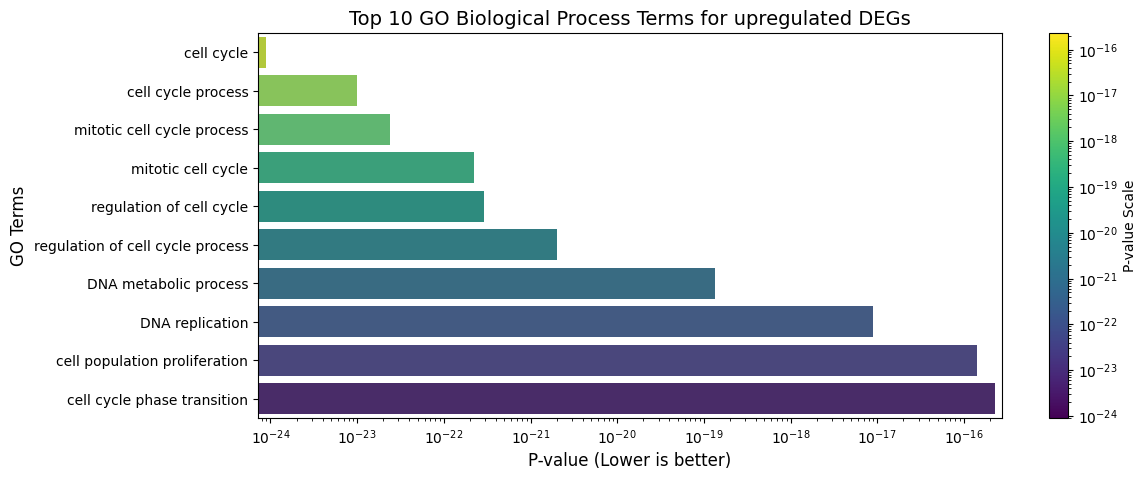

Plot saved as Up_go_BP.png


In [31]:
plot_go_terms(top10_bp, 'Biological Process', 'viridis',save_path="Up_go_BP.png")

Plot for top 10 MF

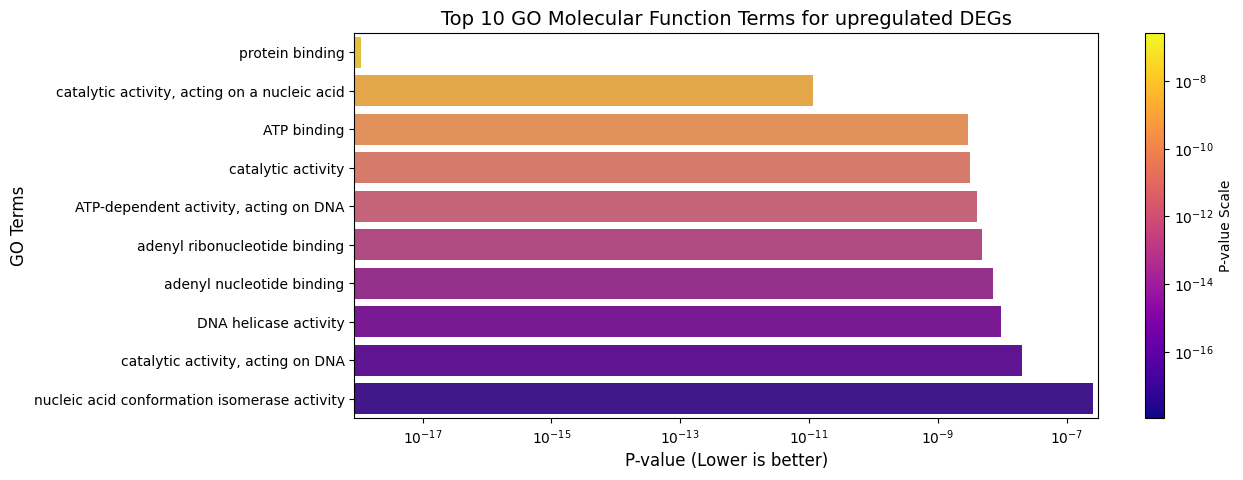

Plot saved as Up_go_MF.png


In [32]:
plot_go_terms(top10_mf, 'Molecular Function', 'plasma',save_path="Up_go_MF.png")

Plot for top 10 CC

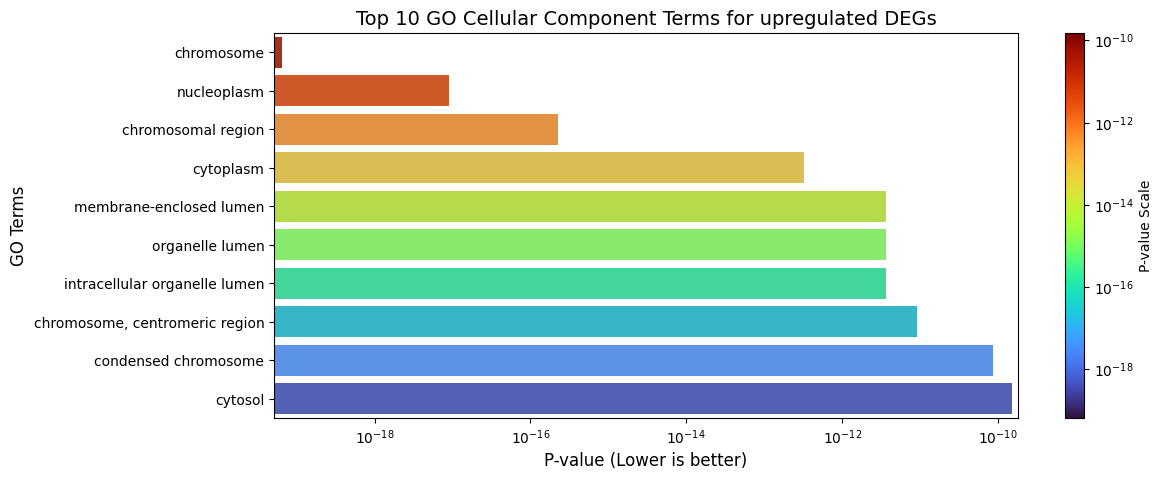

Plot saved as Up_go_CC.png


In [33]:
plot_go_terms(top10_cc, 'Cellular Component', 'turbo',save_path="Up_go_CC.png")

Download Bar Plots

In [34]:
files.download("Up_go_BP.png")
files.download("Up_go_MF.png")
files.download("Up_go_CC.png")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>